In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
fsi = pd.read_csv("fsi.csv")
fsi.head()

,Variables,Total,Restaurants,Fast Food Outlets,Food Caterers,"Cafes, Food Courts & Other Eating Places *"
0,1985 Jan,74.682,93.485,25.772,na,87.270
1,1985 Feb,75.819,98.704,28.303,na,80.653
2,1985 Mar,76.388,90.648,30.364,na,93.570
3,1985 Apr,66.721,77.828,26.006,na,84.328
4,1985 May,70.417,82.594,27.037,na,88.529


In [3]:
fsi.rename(columns = {fsi.columns[0] : "Date"}, inplace=True)
fsi.columns = fsi.columns.str.strip()
fsi.columns

Index(['Date', 'Total', 'Restaurants', 'Fast Food Outlets', 'Food Caterers',
       'Cafes, Food Courts & Other Eating Places *'],
      dtype='object')

In [4]:
fsi["Date"] = pd.to_datetime(fsi.Date)
fsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        430 non-null    datetime64[ns]
 1   Total                                       430 non-null    float64       
 2   Restaurants                                 430 non-null    float64       
 3   Fast Food Outlets                           430 non-null    float64       
 4   Food Caterers                               430 non-null    object        
 5   Cafes, Food Courts & Other Eating Places *  430 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 20.3+ KB


In [5]:
fsi.set_index("Date", inplace=True)
fsi["Year"] = fsi.index.year
fsi["Month"] = fsi.index.month
fsi.index = fsi.index.to_period('M').to_timestamp('M')

In [6]:
fsi.head()

,Total,Restaurants,Fast Food Outlets,Food Caterers,"Cafes, Food Courts & Other Eating Places *",Year,Month
Date,,,,,,,
1985-01-31,74.682,93.485,25.772,na,87.270,1985,1
1985-02-28,75.819,98.704,28.303,na,80.653,1985,2
1985-03-31,76.388,90.648,30.364,na,93.570,1985,3
1985-04-30,66.721,77.828,26.006,na,84.328,1985,4
1985-05-31,70.417,82.594,27.037,na,88.529,1985,5


In [7]:
normal_df = fsi['2015-1-1' : '2019-12-31']
covid_df = fsi['2020-1-1' :]
covid_df.head()

,Total,Restaurants,Fast Food Outlets,Food Caterers,"Cafes, Food Courts & Other Eating Places *",Year,Month
Date,,,,,,,
2020-01-31,107.235,111.156,121.896,105.812,100.549,2020,1
2020-02-29,82.687,73.692,107.451,66.137,87.956,2020,2
2020-03-31,78.192,63.697,111.125,37.932,91.492,2020,3
2020-04-30,46.194,26.755,78.331,36.166,57.110,2020,4
2020-05-31,48.031,30.494,81.257,51.478,54.019,2020,5


In [8]:
normal_df["Food Caterers"] = pd.to_numeric(normal_df["Food Caterers"])
covid_df["Food Caterers"] = pd.to_numeric(covid_df["Food Caterers"])

C:\Users\cmok1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cmok1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
normal_fsi = normal_df.groupby('Month').mean()
covid_fsi = covid_df.groupby('Month').mean()

In [12]:
normal_fsi.columns = normal_fsi.columns.str.strip()
covid_fsi.columns = covid_fsi.columns.str.strip()

In [13]:
covid_fsi.reset_index(inplace=True)

In [14]:
normal_fsi.reset_index(inplace=True)

In [15]:
normal_fsi["Date"] = pd.to_datetime('2020-' + normal_fsi.Month.astype(int).astype(str) + '-1', format = '%Y-%m')
covid_fsi["Date"] = pd.to_datetime('2020-' + covid_fsi.Month.astype(int).astype(str) + '-1', format = '%Y-%m')

In [16]:
normal_fsi.set_index("Date", inplace=True)
covid_fsi.set_index("Date", inplace=True)
# normal_fsi.index = normal_fsi.index.to_period('M').to_timestamp('M')
# covid_fsi.index = covid_fsi.index.to_period('M').to_timestamp('M')

In [17]:
#Load calendar data
holidays = pd.read_csv("holidays.csv")
holidays = holidays.loc[holidays["Year"] == 2019]
holidays["Date"] = holidays["Date"] + '-' + holidays['Year'].astype('str')
holidays["Name"]

134                          New Year's Day
135                               Thaipusam
136            Chinese Lunar New Year's Day
137    Second day of Chinese Lunar New Year
138                         Valentine's Day
139                       Total Defense Day
140               International Women's Day
141                           March Equinox
142                        April Fool's Day
143                             Good Friday
144                         Easter Saturday
145                           Easter Sunday
146                              Labour Day
147                            Mother's Day
148                International Museum Day
149                               Vesak Day
150                      Vesak Day observed
151                         Hari Raya Puasa
152                            Father's Day
153                           June Solstice
154              Singapore Armed Forces Day
155                      Racial Harmony Day
156                            N

In [18]:
holidays["Date"] = pd.to_datetime(holidays["Date"])
holidays.set_index("Date", inplace=True)
holidays["Month"] = holidays.index.month
holidays.head()

,Day,Name,Type,Year,Month
Date,,,,,
2019-01-01,Tuesday,New Year's Day,National holiday,2019,1
2019-01-21,Monday,Thaipusam,Observance,2019,1
2019-02-05,Tuesday,Chinese Lunar New Year's Day,National holiday,2019,2
2019-02-06,Wednesday,Second day of Chinese Lunar New Year,National holiday,2019,2
2019-02-14,Thursday,Valentine's Day,Observance,2019,2


In [19]:
religious_holidays = [holidays["Name"][2], holidays["Name"][11], holidays["Name"][15], holidays["Name"][23], holidays["Name"][27], holidays["Name"][31]]
religious_holidays_df = holidays.loc[holidays["Name"].isin(religious_holidays)]
religious_holidays_df.index

DatetimeIndex(['2019-02-05', '2019-04-21', '2019-05-19', '2019-08-11',
               '2019-10-27', '2019-12-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
import datetime as dt
religious_holidays_df.index = religious_holidays_df.index + dt.timedelta(days=365)
religious_holidays_df.head()

,Day,Name,Type,Year,Month
Date,,,,,
2020-02-05,Tuesday,Chinese Lunar New Year's Day,National holiday,2019,2
2020-04-20,Sunday,Easter Sunday,Observance,2019,4
2020-05-18,Sunday,Vesak Day,National holiday,2019,5
2020-08-10,Sunday,Hari Raya Haji,National holiday,2019,8
2020-10-26,Sunday,Diwali/Deepavali,National holiday,2019,10


In [21]:
xticks = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

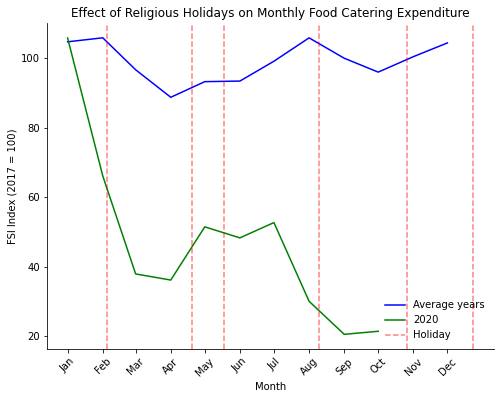

In [22]:
%matplotlib inline

plt.figure(figsize = (8,6))

plt.plot(normal_fsi["Food Caterers"], '-', color="blue", label = "Average years")
plt.plot(covid_fsi["Food Caterers"], '-', color = 'green', label = "2020")
plt.axvline(x=religious_holidays_df.index[0], color='red', linestyle = "--", alpha = 0.5, label = "Holiday")
for i in religious_holidays_df.index[1:]:
    vert_line = plt.axvline(x=i, color='red', linestyle='--', alpha = 0.5);

plt.xlabel("Month")
plt.ylabel("FSI Index (2017 = 100)")
plt.title("Effect of Religious Holidays on Monthly Food Catering Expenditure")

plt.legend(loc = 'lower right', frameon = False)


plt.xticks(list(normal_fsi.index), xticks, rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()